# **Palmer Penguins**     
This notebook contains analysis of the Palmer Penguins dataset. 

## Setting up the Data

***

#### Importing Libraries 
- Pandas is a Python Library used for cleaning, analyzing and manipulating data.   
- Matplotlib is a Python Library used for plotting.
- Numpy is a Python Library for working with arrays, linear algebra, and matrices

In [44]:
# Import Pandas    
import pandas as pd 

# Import Matplotlib
import matplotlib.pyplot as plt

# Import Numpy
import numpy as np

#Import Seaborn
import seaborn as sns

#### Loading the Data   
- The Palmer Penguins dataset, which is a csv file, is loaded using Pandas *read_csv* functionality.   
- The variable *peng* is assigned for ease of use when writing Python code.

In [2]:
# Load the penguins dataset
peng = pd.read_csv('penguins.csv')

#### Checking the Data has loaded   
- Running the variable *peng* will return a view of all the columns as well as some of the values.
- It will also summarise the amount of rows and columns   

In [3]:
#Check that the data has loaded
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Overview of Dataset

***

##### The following is a brief summary of the dataset:
- A total of 344 penguins were analyzed.
- Males and females from three species of penguins were analyzed.
- There are 8 different variables used in the analysis.
- The penguins were analyzed from three islands in the Palmer Archipelego in the Antartic.
- The analysis was conducted over three years.

##### Variables and Variable Types:

- As mentioned previously, eight variables were used to analyze the penguins. Those variables, and the variable (data) types, are below:

In [4]:
# list the column names, i.e. variables, and each variable type
peng.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

- In Python, there are four main data (variable) types:
    1.  String. A series of characters. Referred to as 'str' in Python, 'object' in a pandas dataframe.
    2.  Integer. Whole numbers. Referred to as 'int' in Python, 'int64' in a pandas dataframe.
    3.  Float. A decimal point number. Referred to as 'float' in Python, 'float64' in a pandas dataframe.
    4.  Boolean. A True or False value. Referred to as 'bool' in both Python and pandas dataframe.

- Per the penguins dataset:   
    - species, island and sex are calssified as object (i.e. string),
    - bill length, bill depth, flipper length and body mass are classified as float64 (i.e. float),
    - year is classified as int64 (i.e., int).

- The variable type classifications seem appropriate.    
    - Any numerical calculations will only be done on the bill length, bill depth, flipper length, and body mass so the float classification is fine.
    - The int classification for year is also fine

## Analyzing the Data   

***

### **1. Initial Basic Analysis**

##### ***First of all, let's see if there is any missing data:***

In [5]:
# Check if there is any missing data from the dataset
peng.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [6]:
# Return rows with missing data
missing = peng[peng.isna().any(axis=1)]
missing

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


##### As can be seen from the above, there is very little missing data; 2 values are missing from four of the Columns, and 11 values are missing from the sex column.    
##### However, in order not to skew any further analysis, I am going to remove those 11 rows:

In [7]:
# Remove rows with missing values
peng.dropna(inplace=True)

##### Check there are no remaining missing values:

In [8]:
# Check for missing values
peng.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

##### ***Now that there is no missing data, let's look at some basic analysis of the data:***

##### ***How many penguins of each species are there?***

In [9]:
# Count number of each species
peng['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

##### ***How many penguins of each sex are there?***

In [10]:
# Count number of each sex (this won't add up to the full amount as 11 values are missing)
peng['sex'].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

##### ***What is the breakdown of sex in each species?***

In [11]:
# Number of males and females per species
peng.groupby('species').sex.value_counts()

species    sex   
Adelie     female    73
           male      73
Chinstrap  female    34
           male      34
Gentoo     male      61
           female    58
Name: count, dtype: int64

##### ***How many penguins are on each island?***

In [12]:
# Number of penguins on each island
peng['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

##### ***What species of penguin are on each island?***

In [13]:
# Penguin species per island
peng.groupby('island').species.value_counts()

island     species  
Biscoe     Gentoo       119
           Adelie        44
Dream      Chinstrap     68
           Adelie        55
Torgersen  Adelie        47
Name: count, dtype: int64

##### ***What is the average size(body mass), bill length, bill depth and flipper length per species and per sex?***

In [14]:
# Averages per species and sex
avg3 = peng.groupby(['species', 'sex'])[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].mean().sort_values('species')
round(avg3)

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female       3369.0            37.0           18.0   
          male         4043.0            40.0           19.0   
Chinstrap female       3527.0            47.0           18.0   
          male         3939.0            51.0           19.0   
Gentoo    female       4680.0            46.0           14.0   
          male         5485.0            49.0           16.0   

                  flipper_length_mm  
species   sex                        
Adelie    female              188.0  
          male                192.0  
Chinstrap female              192.0  
          male                200.0  
Gentoo    female              213.0  
          male                222.0

##### ***What is the standard deviation of each of the above?***

In [15]:
# Standard Deviation of variables
sd1 = peng.groupby(['species', 'sex'])[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].std().sort_values('species')
round(sd1, 2)

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female       269.38            2.03           0.94   
          male         346.81            2.28           1.02   
Chinstrap female       285.33            3.11           0.78   
          male         362.14            1.56           0.76   
Gentoo    female       281.58            2.05           0.54   
          male         313.16            2.72           0.74   

                  flipper_length_mm  
species   sex                        
Adelie    female               5.60  
          male                 6.60  
Chinstrap female               5.75  
          male                 5.98  
Gentoo    female               3.90  
          male                 5.67

### **2. Plot Analysis**

##### ***Firstly, let's take a look at the measurement variables on histograms:***

Text(0.5, 0, 'mm')

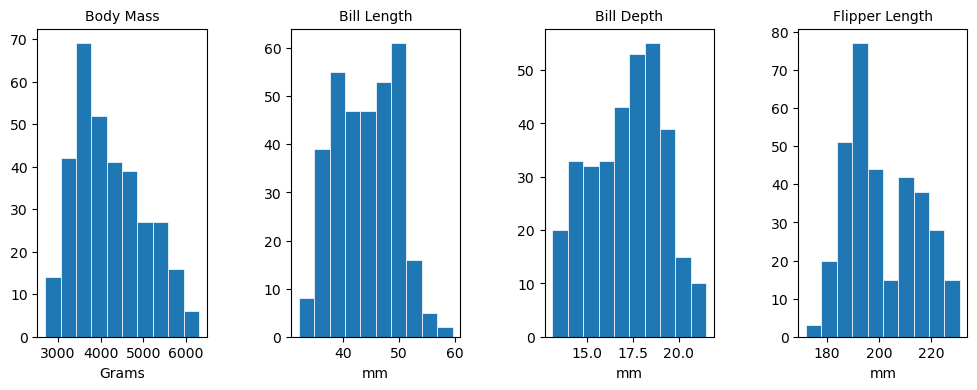

In [16]:
# Plot measurement variables on Histograms

body_mass = peng['body_mass_g']
bill_length = peng['bill_length_mm']
bill_depth = peng['bill_depth_mm']
flipper = peng['flipper_length_mm']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 4))
plt.style.use('ggplot')
plt.subplots_adjust(wspace=.5)

ax1.hist(body_mass, edgecolor='White')
ax1.set_title('Body Mass', fontsize=10)
ax1.set_xlabel('Grams', fontsize=10)

ax2.hist(bill_length, edgecolor='White')
ax2.set_title('Bill Length', fontsize=10)
ax2.set_xlabel('mm', fontsize=10)

ax3.hist(bill_depth, edgecolor='White')
ax3.set_title('Bill Depth', fontsize=10)
ax3.set_xlabel('mm', fontsize=10)

ax4.hist(flipper, edgecolor='White')
ax4.set_title('Flipper Length', fontsize=10)
ax4.set_xlabel('mm', fontsize=10)

##### ***Average body mass, bill length, bill depth and flipper length per species per sex***

In [17]:
# Average measurements 
avg2 = peng.groupby(['species', 'sex'])[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].mean()
round(avg2)

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female       3369.0            37.0           18.0   
          male         4043.0            40.0           19.0   
Chinstrap female       3527.0            47.0           18.0   
          male         3939.0            51.0           19.0   
Gentoo    female       4680.0            46.0           14.0   
          male         5485.0            49.0           16.0   

                  flipper_length_mm  
species   sex                        
Adelie    female              188.0  
          male                192.0  
Chinstrap female              192.0  
          male                200.0  
Gentoo    female              213.0  
          male                222.0

##### ***Plot illustrating average size (body mass) per species per sex:***

<Axes: title={'center': 'Average Body Mass per Species per Sex'}, xlabel='Species', ylabel='Grams'>

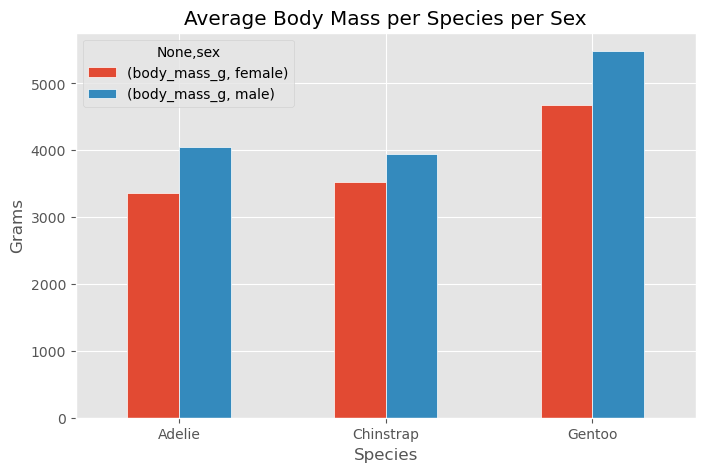

In [18]:
# Plot body mass average per species, per sex.
graph1 = peng.groupby(['species', 'sex'])[['body_mass_g']].mean().sort_values('species').unstack()
plt.style.use('ggplot')
graph1.plot(kind='bar', title='Average Body Mass per Species per Sex', xlabel='Species', ylabel='Grams', rot=0, figsize=(8, 5), edgecolor='white')

##### ***Plot illustrating average bill length per species per sex:***

<Axes: title={'center': 'Average Bill Length per Species per Sex'}, xlabel='Species', ylabel='Length (mm)'>

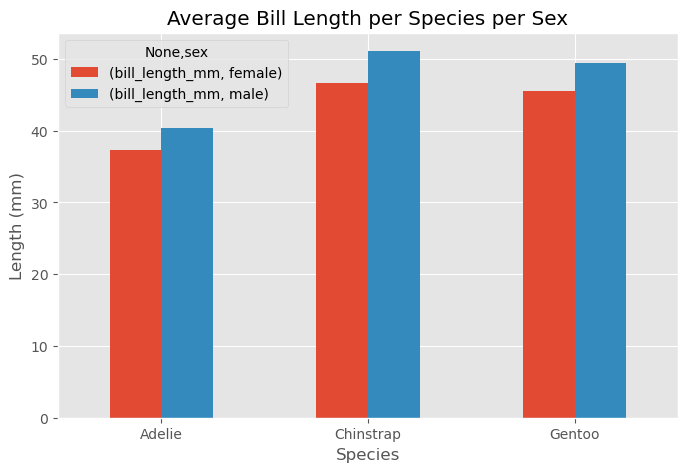

In [19]:
# Plot bill length average per species, per sex.
graph2 = peng.groupby(['species', 'sex'])[['bill_length_mm']].mean().sort_values('species').unstack()
plt.style.use('ggplot')
graph2.plot(kind='bar', title='Average Bill Length per Species per Sex', xlabel='Species', ylabel='Length (mm)', rot=0, figsize=(8, 5))

##### ***Plot illustrating average bill depth per species per sex:***

<Axes: title={'center': 'Average Bill Depth per Species per Sex'}, xlabel='Species', ylabel='Length (mm)'>

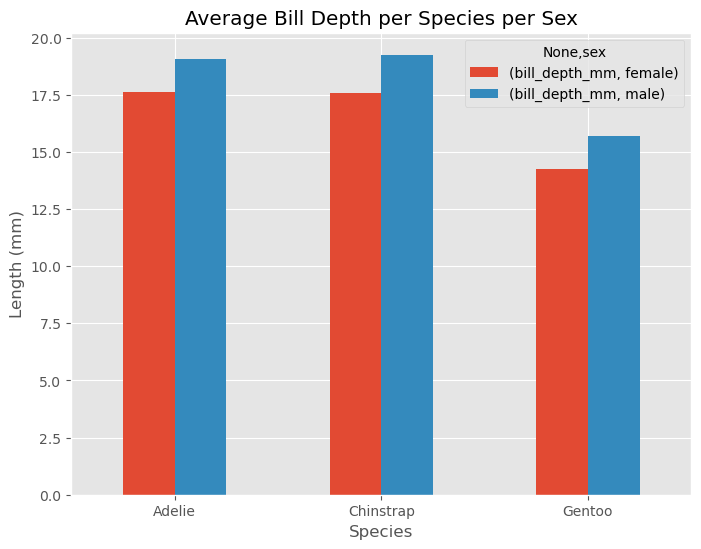

In [20]:
# Plot bill depth average per species, per sex.
graph3 = peng.groupby(['species', 'sex'])[['bill_depth_mm']].mean().sort_values('species').unstack()
plt.style.use('ggplot')
graph3.plot(kind='bar', title='Average Bill Depth per Species per Sex', xlabel='Species', ylabel='Length (mm)', rot=0, figsize=(8,6))

##### ***Plot illustrating average flipper length per species per sex:***

<Axes: title={'center': 'Avg Flipper Length per Species per Sex'}, xlabel='Species', ylabel='Length (mm)'>

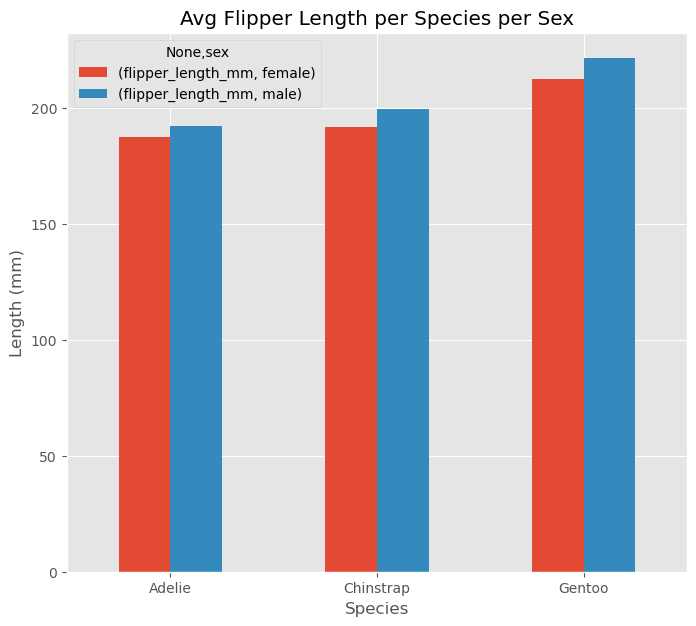

In [21]:
# Plot flipper length average per species, per sex.
graph4 = peng.groupby(['species', 'sex'])[['flipper_length_mm']].mean().sort_values('species').unstack()
plt.style.use('ggplot')
graph4.plot(kind='bar', title='Avg Flipper Length per Species per Sex', xlabel='Species', ylabel='Length (mm)', rot=0, figsize=(8, 7))

### **What is the Initial Basic Analysis telling us?**

* Taking the averages of the measurement variables:   
    * Body Mass has large standard deviations across the board, which tells us there are lots of values far from the mean.    
    * For bill length, bill depth, and flipper length, the standard deviations are small, telling us most of the measurements are close to the mean.
* In all categories, on average the male of each species is larger than the female.

## Correlations

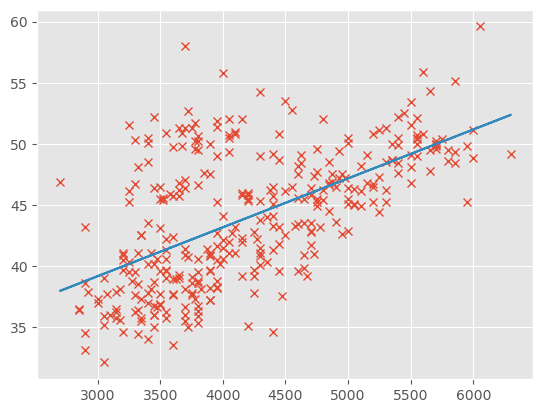

In [90]:
body = peng['body_mass_g']
bill = peng['bill_length_mm']

plt.plot(body, bill, 'x')
m, b = np.polyfit(body, bill, 1)
plt.plot(body, m*body+b )

<Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>

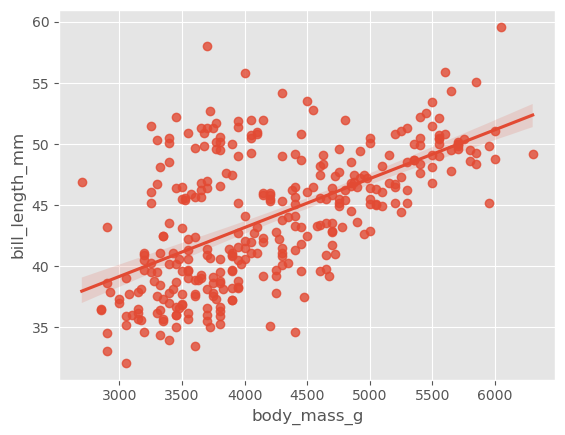

In [93]:
body = peng['body_mass_g']
bill = peng['bill_length_mm']

sns.regplot(x=body, y=bill)

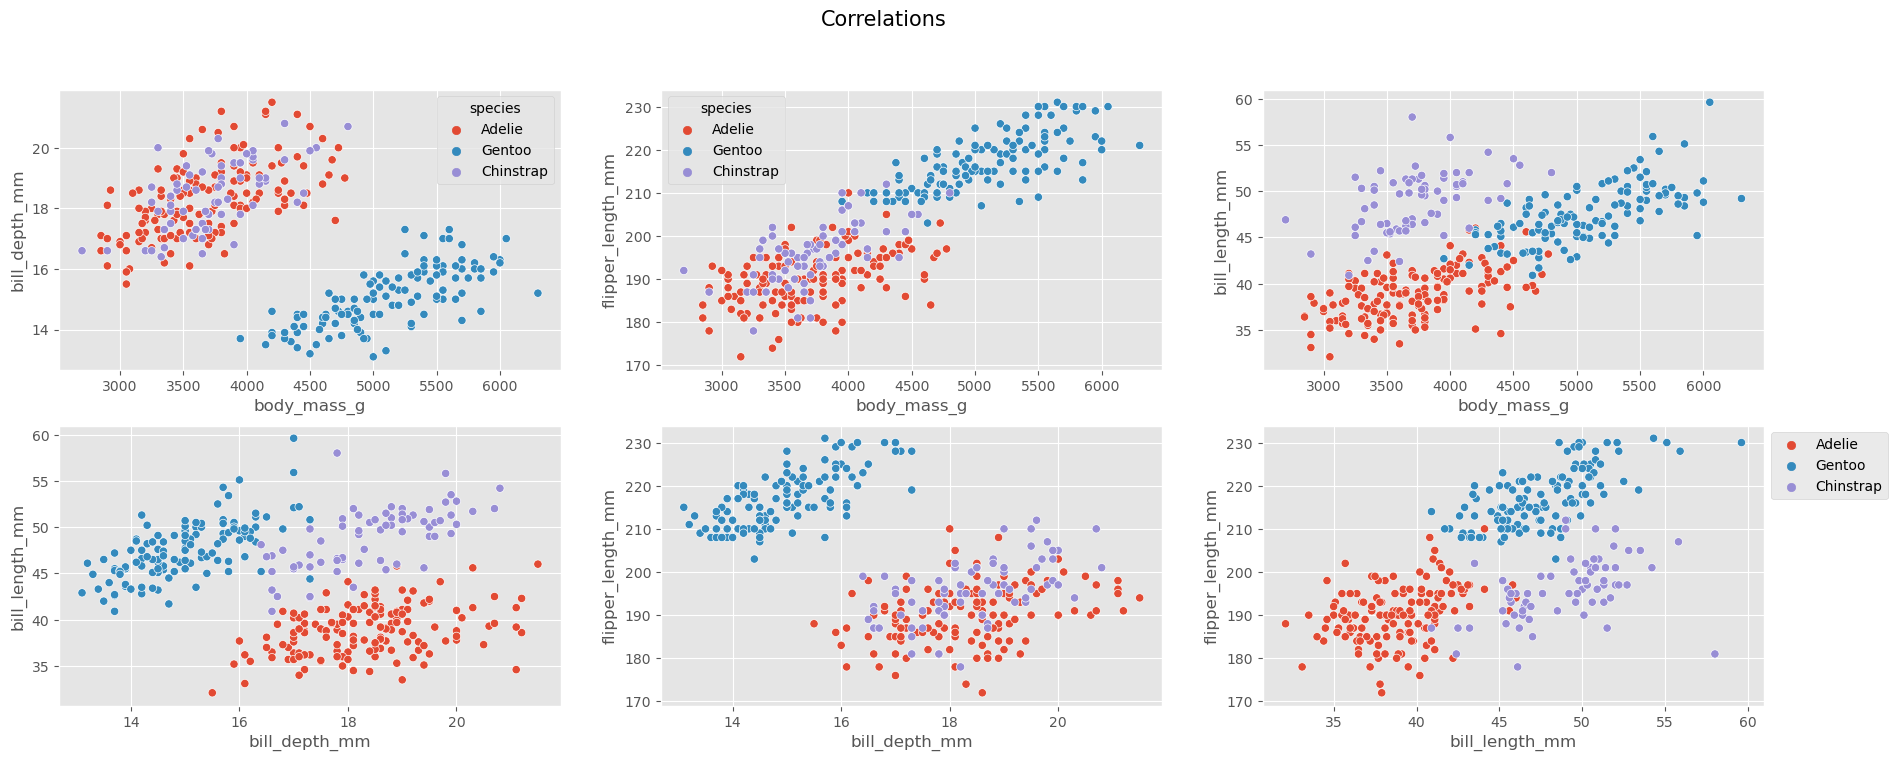

In [86]:
fig, axes = plt.subplots(2, 3, figsize=(22, 8))
fig.suptitle('Correlations', fontsize=15)
sns.scatterplot(data=peng, x="body_mass_g", y="bill_depth_mm", hue="species", ax=axes[0,0])
sns.scatterplot(data=peng, x="body_mass_g", y="flipper_length_mm", hue="species", ax=axes[0,1])
sns.scatterplot(data=peng, x="body_mass_g", y="bill_length_mm", hue="species", ax=axes[0,2], legend=False)
sns.scatterplot(data=peng, x="bill_depth_mm", y="bill_length_mm", hue="species", ax=axes[1,0], legend=False)
sns.scatterplot(data=peng, x="bill_depth_mm", y="flipper_length_mm", hue="species", ax=axes[1,1], legend=False)
sns.scatterplot(data=peng, x="bill_length_mm", y="flipper_length_mm", hue="species", ax=axes[1,2])
plt.legend(loc=2, bbox_to_anchor=(1, 1))

Text(0, 0.5, 'mm')

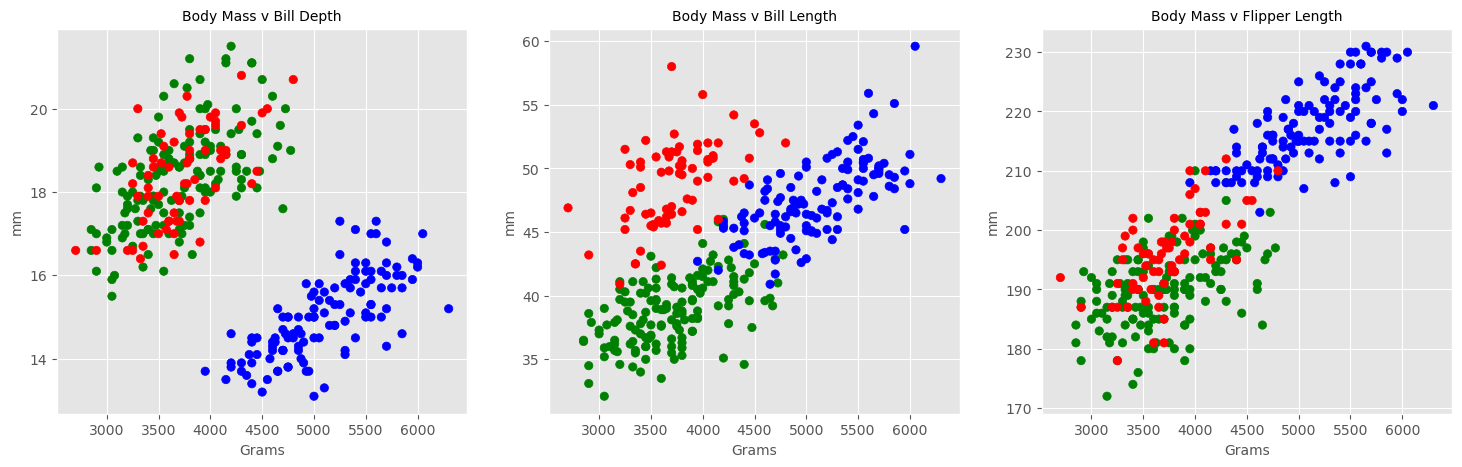

In [25]:


fig, (axs1, axs2, axs3) = plt.subplots(1,3, figsize=(18,5))
colors = {'Adelie':'green', 'Chinstrap':'red', 'Gentoo':'blue'}

axs1.scatter(peng['body_mass_g'], peng['bill_depth_mm'], c = peng['species'].map(colors))
axs2.scatter(peng['body_mass_g'], peng['bill_length_mm'], c = peng['species'].map(colors))
axs3.scatter(peng['body_mass_g'], peng['flipper_length_mm'], c = peng['species'].map(colors))

axs1.set_title('Body Mass v Bill Depth', fontsize=10)
axs2.set_title('Body Mass v Bill Length', fontsize=10)
axs3.set_title('Body Mass v Flipper Length', fontsize=10)

axs1.set_xlabel('Grams', fontsize=10)
axs2.set_xlabel('Grams', fontsize=10)
axs3.set_xlabel('Grams', fontsize=10)

axs1.set_ylabel('mm', fontsize=10)
axs2.set_ylabel('mm', fontsize=10)
axs3.set_ylabel('mm', fontsize=10)


In [27]:
from seaborn import pairplot

c:\Users\posea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\posea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\posea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\posea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

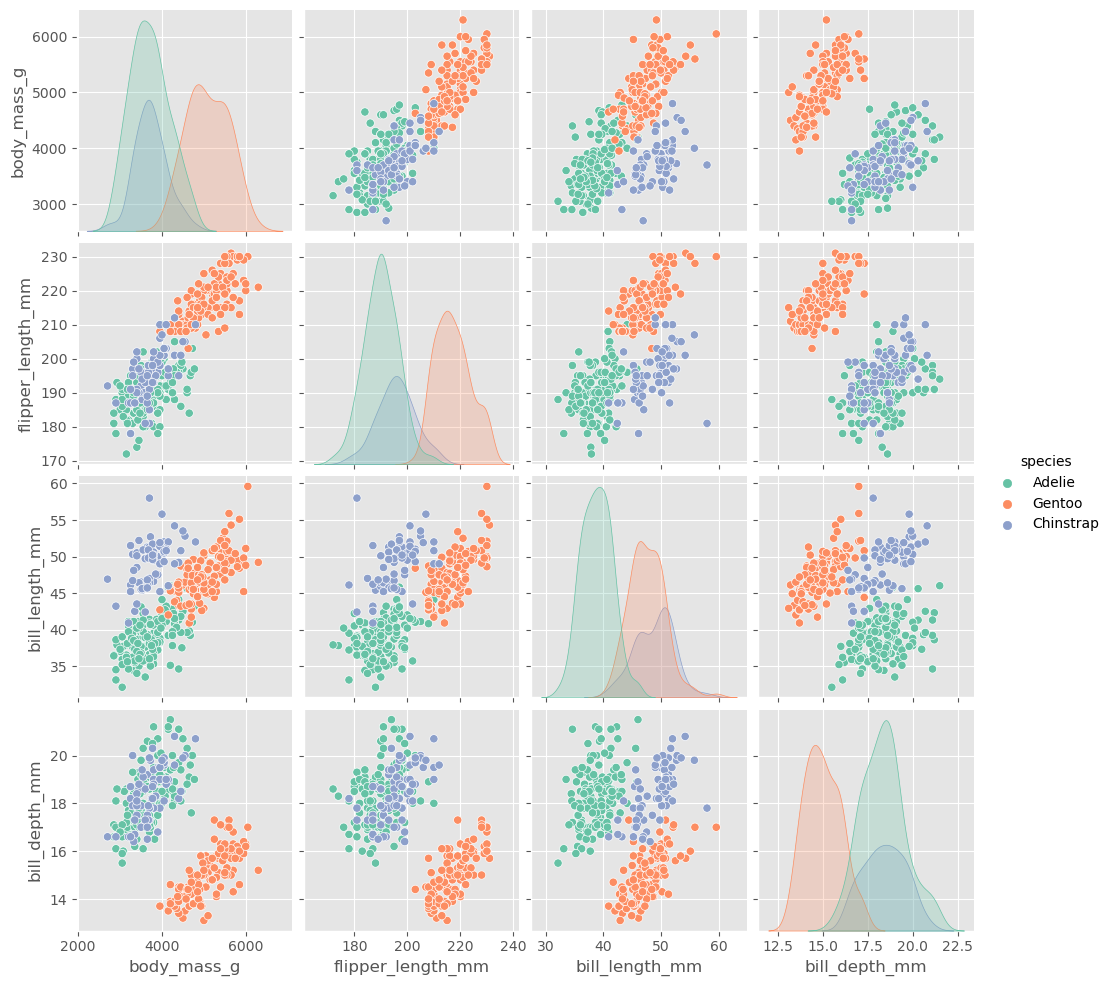

In [43]:
peng2 = peng[['species', 'body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']]
pairplot(peng2, hue='species', palette='Set2')

c:\Users\posea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\posea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\posea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\posea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

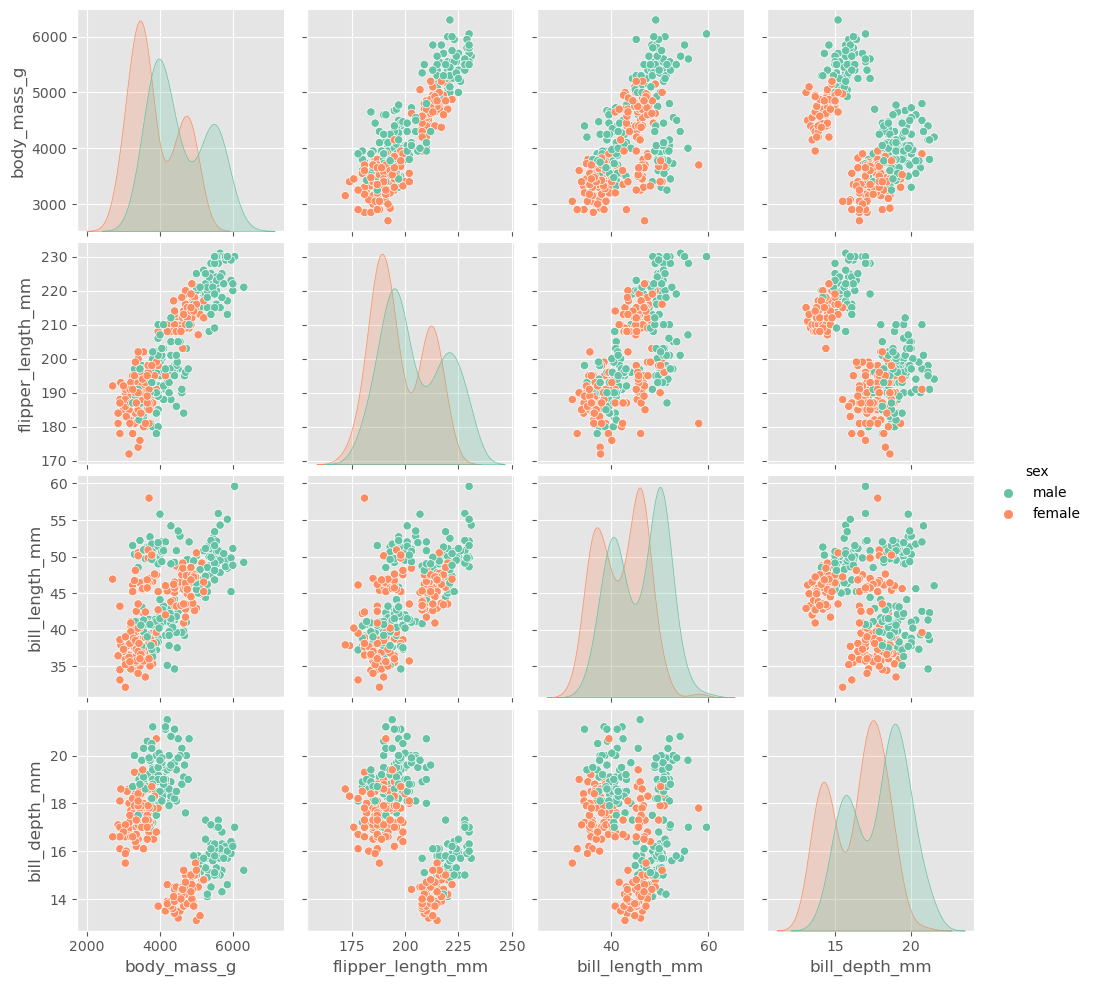

In [61]:
peng2 = peng[['sex', 'body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']]
pairplot(peng2, hue='sex', palette='Set2')

### **Summary**

In [ ]:
# Describe the dataset
peng.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


***
### End